In [287]:
import pandas as pd
import numpy as np
france = pd.read_excel ('/Users/carriechen/Desktop/EC1B1 project/France.xlsx') 
#importing the raw French data from IMF

In [288]:
US = pd.read_excel ('/Users/carriechen/Desktop/EC1B1 project/USCPI.xlsx')
#importing the US CPI data, ready to merge the 2 dataframes

In [289]:
merged_df = pd.concat([france, US], axis=1)
#merged the 2 dataframes such that the US CPI column is added
pd.options.display.max_rows = None
print(merged_df)


        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          26.782147         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

In [290]:
import numpy as np
#this is to take the natural log of the exchange rate column.
merged_df['(i) France: Natural log of the Exchange Rate per U.S. Dollar'] = np.log(merged_df['France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'])    
print(merged_df)

        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          26.782147         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

In [291]:
#to find the difference between a month and the following month, I took the column and duplicated it with a small difference - I shifted every row down by one position. Therefore, if the first data entry (ie from teh first month) is in row 0, it is now in row 1
merged_df["Shifted Natural log of the Exchange Rate per U.S. Dollar"] = merged_df["(i) France: Natural log of the Exchange Rate per U.S. Dollar"].shift(1)
#i then created a new column, one for the difference between the consecutive months. 
#I subtracted the original column values from the shifted ones. this gives the change from one month to the next
#for example: if row 1 from the non-shifted column contains the data for month 2, row 1 contains the data for month 1 in the shifted column. therefore, subtracting them gives the monthly change
merged_df["(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar"] = merged_df["(i) France: Natural log of the Exchange Rate per U.S. Dollar"] - merged_df["Shifted Natural log of the Exchange Rate per U.S. Dollar"]
print(merged_df)
#row 0 gives a NaN value since the data for the month 0 (ie December 1959), the one before Jan 1960 where our data starts, does not exist.

        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          26.782147         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

In [292]:
#following a similar process to the monthly difference in the natural log of the exchange rate, I created a new column where all values have been shifted down one row
merged_df["Shifted French CPI"] = merged_df["France: Prices, Consumer Price Index"].shift(1)
#I then subtracted these shifted values from the original data column
merged_df["(iii) Monthly difference in the inflation rate"] = merged_df["France: Prices, Consumer Price Index"] - merged_df["Shifted French CPI"]

In [293]:
merged_df['(iv) France: Natural log of Industrial Production'] = np.log(merged_df['France: Economic Activity, Industrial Production, Index'])    
#created a new column where I have taken logs of each value in the industrial production column

In [294]:
#following a similar process to the monthly difference in the natural log of the exchange rate, I created a new column where all values have been shifted down one row
merged_df["Shifted French Industrial production"] = merged_df["(iv) France: Natural log of Industrial Production"].shift(1)
#I then subtracted these shifted values from the original data column
merged_df["(iii) Monthly growth in industrial production"] = merged_df["(iv) France: Natural log of Industrial Production"] - merged_df["Shifted French Industrial production"]

In [295]:
#following a similar process to the monthly difference in the natural log of the exchange rate, I created a new column where all values have been shifted down 12 rows
merged_df["Shifted 12 rows French Industrial production"] = merged_df["(iv) France: Natural log of Industrial Production"].shift(12)
#I then subtracted these shifted values from the original data column
merged_df["(vi) France: Industrial production growth vs previous year"] = merged_df["(iv) France: Natural log of Industrial Production"] - merged_df["Shifted 12 rows French Industrial production"]

In [296]:
merged_df['(i) US: Natural log of CPI'] = np.log(merged_df['United States: Prices, Consumer Price Index'])    

In [297]:
#following a similar process to the monthly difference in the natural log of the exchange rate, I created a new column where all values have been shifted down one row
merged_df["Shifted US natural log CPI"] = merged_df["United States: Prices, Consumer Price Index"].shift(1)
#I then subtracted these shifted values from the original data column
merged_df["(iii) Monthly difference in the inflation rate"] = merged_df["United States: Prices, Consumer Price Index"] - merged_df["Shifted US natural log CPI"]

In [298]:
stripped_df = merged_df.drop(['Shifted Natural log of the Exchange Rate per U.S. Dollar',
                             'Shifted French CPI', 
                             'Shifted French Industrial production', 
                             'Shifted 12 rows French Industrial production', 
                             'Shifted US natural log CPI'], 
                            axis=1)
print(stripped_df)

        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          26.782147         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

In [299]:
stripped_df.isnull().sum() 
# This is to check the number of missing values in the dataset.

Month                                                                               0
France: Economic Activity, Industrial Production, Index                             0
France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate     0
France: Prices, Consumer Price Index                                                0
United States: Prices, Consumer Price Index                                         0
(i) France: Natural log of the Exchange Rate per U.S. Dollar                        0
(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar           1
(iii) Monthly difference in the inflation rate                                      1
(iv) France: Natural log of Industrial Production                                   0
(iii) Monthly growth in industrial production                                       1
(vi) France: Industrial production growth vs previous year                         12
(i) US: Natural log of CPI                            

In [300]:
def outlier_limits(col):
    Top99_5, Lowest0_5 = np.nanpercentile(col, [99.5, 0.5])
    Upper_limit = Top99_5
    Lower_limit = Lowest0_5
    return Upper_limit, Lower_limit

#We defined top 0.5% and bottom 0.5% as outliers


In [301]:
for column in stripped_df.columns:
    if stripped_df[column].dtype != 'object':
        Upper_limit, Lower_limit = outlier_limits(stripped_df[column])
        stripped_df[column] = np.where((stripped_df[column] > Upper_limit)| (stripped_df[column] < Lower_limit), np.nan, stripped_df[column])
        
 # We want to make these outliers missing value

In [302]:
stripped_df.isnull().sum()
# this tells us the number of missing values after converting outliers into missing value. 
# The difference in missing value after and before tells us the number of outliers identified.

Month                                                                               0
France: Economic Activity, Industrial Production, Index                             4
France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate     4
France: Prices, Consumer Price Index                                                4
United States: Prices, Consumer Price Index                                         3
(i) France: Natural log of the Exchange Rate per U.S. Dollar                        4
(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar           5
(iii) Monthly difference in the inflation rate                                      5
(iv) France: Natural log of Industrial Production                                   4
(iii) Monthly growth in industrial production                                       5
(vi) France: Industrial production growth vs previous year                         16
(i) US: Natural log of CPI                            

In [303]:
new_stripped_df = stripped_df.interpolate()
new_stripped_df.isnull().sum()
#Using linear interpolation, we can fill in the missing values.
#Checking the number of missing values after linear interpolation.

Month                                                                               0
France: Economic Activity, Industrial Production, Index                             0
France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate     0
France: Prices, Consumer Price Index                                                1
United States: Prices, Consumer Price Index                                         1
(i) France: Natural log of the Exchange Rate per U.S. Dollar                        0
(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar           1
(iii) Monthly difference in the inflation rate                                      1
(iv) France: Natural log of Industrial Production                                   0
(iii) Monthly growth in industrial production                                       1
(vi) France: Industrial production growth vs previous year                         12
(i) US: Natural log of CPI                            

In [304]:
#To construct a series for monthly real exchange rate growth, where the real exchange rate is measured for your country relative to the united states
#creating a new column for real exchange rates. formula from LT 5 is nominal*price in US / price in France
new_stripped_df['Nominal exchange rate * US prices'] = new_stripped_df['France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate'] * new_stripped_df['United States: Prices, Consumer Price Index']
new_stripped_df['Monthly real exchange rate'] = new_stripped_df['Nominal exchange rate * US prices'] / new_stripped_df['France: Prices, Consumer Price Index']
print(new_stripped_df['Monthly real exchange rate'])


0           NaN
1      6.420277
2      6.420277
3      6.432249
4      6.447059
5      6.458999
6      6.449115
7      6.390443
8      6.380768
9      6.414170
10     6.394835
11     6.380410
12     6.375617
13     6.370831
14     6.375617
15     6.380410
16     6.394835
17     6.409325
18     6.403973
19     6.344575
20     6.332766
21     6.263124
22     6.199493
23     6.177076
24     6.137142
25     6.151332
26     6.114013
27     6.121945
28     6.103471
29     6.079008
30     6.074789
31     6.080855
32     6.076641
33     6.064572
34     6.028657
35     6.004946
36     5.958077
37     5.923403
38     5.925643
39     5.914203
40     5.891456
41     5.871257
42     5.868025
43     5.845776
44     5.807247
45     5.815212
46     5.798859
47     5.806802
48     5.785155
49     5.779771
50     5.774392
51     5.769027
52     5.763668
53     5.771603
54     5.774169
55     5.744983
56     5.737050
57     5.721292
58     5.739688
59     5.739688
60     5.708323
61     5.703127
62     5

In [305]:
#France monthly exchange rate growth

new_stripped_df['France:Monthly real exchange rate growth']= np.log(new_stripped_df['Monthly real exchange rate']) - np.log(new_stripped_df['Monthly real exchange rate']).shift(1)

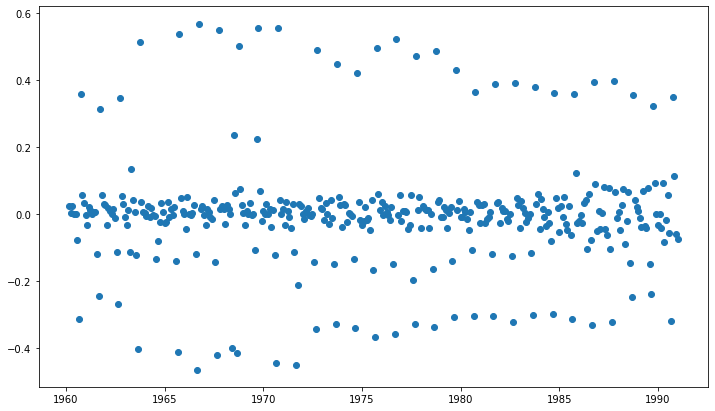

In [306]:
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.dates import YearLocator, DateFormatter
f, ax = plt.subplots(figsize = [12, 7])
tempdf = pd.DataFrame({"val": list(range(372))})
tempdf["dates"] = [datetime(1960,1,31) + relativedelta(months=x) for x in range(0,372)]
x = tempdf["dates"]
y = new_stripped_df["(iii) Monthly growth in industrial production"]
plt.scatter(x, y)
ax.xaxis.set_major_locator(YearLocator(5))
#labels every 5 years on x axis to not clutter
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

In [307]:
print(new_stripped_df)

        Month  France: Economic Activity, Industrial Production, Index  \
0    Jan 1960                                          37.698844         
1    Feb 1960                                          38.582145         
2    Mar 1960                                          38.718038         
3    Apr 1960                                          39.601339         
4    May 1960                                          39.635312         
5    Jun 1960                                          39.635312         
6    Jul 1960                                          36.611704         
7    Aug 1960                                          37.472357         
8    Sep 1960                                          38.333009         
9    Oct 1960                                          40.586560         
10   Nov 1960                                          41.956809         
11   Dec 1960                                          41.820917         
12   Jan 1961                         

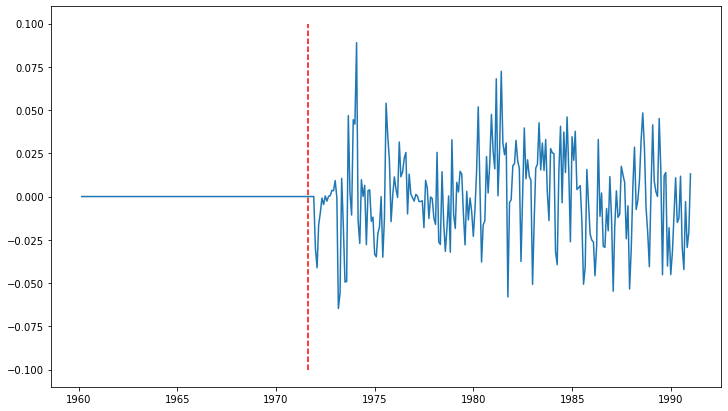

In [308]:
f, ax = plt.subplots(figsize = [12, 7])
ax.plot(tempdf["dates"], new_stripped_df['(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar'])
nobretton = datetime(1971,8,15)
ax.vlines(nobretton,-0.1, 0.1, linestyles='dashed', colors='red')
#date Bretton Woods ended
ax.xaxis.set_major_locator(YearLocator(5))
#labels every 5 years on x axis to not clutter
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

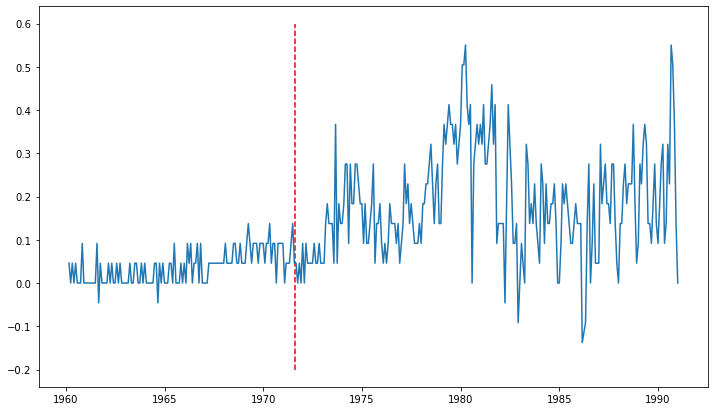

In [309]:
f, ax = plt.subplots(figsize = [12, 7])
ax.plot(tempdf["dates"], new_stripped_df['(iii) Monthly difference in the inflation rate'])
ax.vlines(nobretton,-0.2, 0.6, linestyles='dashed', colors='red')
ax.xaxis.set_major_locator(YearLocator(5))
#labels every 5 years on x axis to not clutter
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

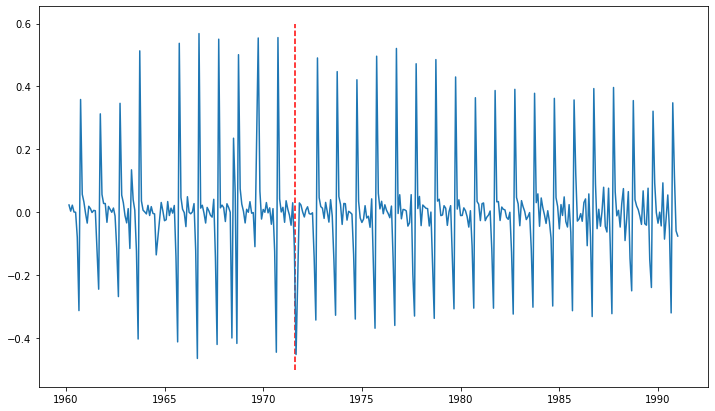

In [310]:
f, ax = plt.subplots(figsize = [12, 7])
ax.plot(tempdf["dates"], new_stripped_df['(iii) Monthly growth in industrial production'])
ax.vlines(nobretton,-0.5, 0.6, linestyles='dashed', colors='red')
ax.xaxis.set_major_locator(YearLocator(5))
#labels every 5 years on x axis to not clutter
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

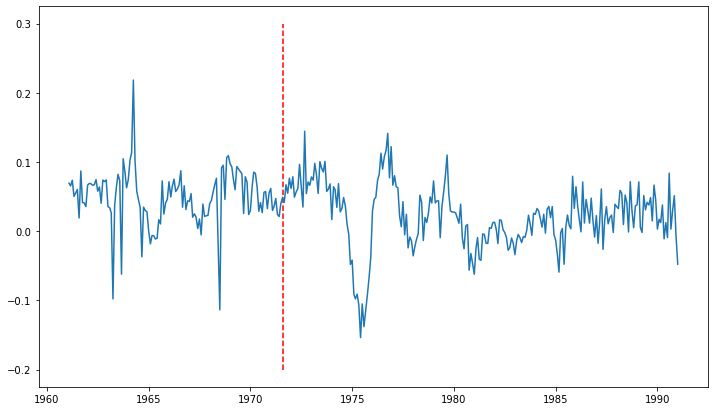

In [311]:
f, ax = plt.subplots(figsize = [12, 7])
ax.plot(tempdf["dates"], new_stripped_df['(vi) France: Industrial production growth vs previous year'])
ax.vlines(nobretton,-0.2, 0.3, linestyles='dashed', colors='red')
ax.xaxis.set_major_locator(YearLocator(5))
#labels every 5 years on x axis to not clutter
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

In [312]:
new_stripped_df[0:127].std(skipna=True, numeric_only=True)
#standard deviations of before leaving bretton woods excluding year before

France: Economic Activity, Industrial Production, Index                            9.487690
France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate    0.181230
France: Prices, Consumer Price Index                                               1.417897
United States: Prices, Consumer Price Index                                        1.198011
(i) France: Natural log of the Exchange Rate per U.S. Dollar                       0.034589
(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar          0.000000
(iii) Monthly difference in the inflation rate                                     0.037667
(iv) France: Natural log of Industrial Production                                  0.198194
(iii) Monthly growth in industrial production                                      0.172503
(vi) France: Industrial production growth vs previous year                         0.041690
(i) US: Natural log of CPI                                                      

In [313]:
new_stripped_df[152:].std(skipna=True, numeric_only=True)
#standard deviations of after leaving bretton woods excluding year after

France: Economic Activity, Industrial Production, Index                             11.016828
France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate      1.470770
France: Prices, Consumer Price Index                                                18.108100
United States: Prices, Consumer Price Index                                         12.607284
(i) France: Natural log of the Exchange Rate per U.S. Dollar                         0.238216
(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar            0.026130
(iii) Monthly difference in the inflation rate                                       0.122751
(iv) France: Natural log of Industrial Production                                    0.145980
(iii) Monthly growth in industrial production                                        0.160654
(vi) France: Industrial production growth vs previous year                           0.046426
(i) US: Natural log of CPI                                  

In [314]:
final_df = new_stripped_df.drop(['Nominal exchange rate * US prices'], axis=1)

In [315]:
final_df.rename(columns={'France: Economic Activity, Industrial Production, Index': 'France: Industrial Production',
                         'France: Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate': 'France: Nominal ER, USD',
                         'France: Prices, Consumer Price Index': 'France: CPI',
                         'United States: Prices, Consumer Price Index': 'US: CPI',
                         '(i) France: Natural log of the Exchange Rate per U.S. Dollar': '(i) France: Nlog ER, USD',
                         '(ii) Monthly difference, Natural log of the Exchange Rate per U.S. Dollar': '(ii) France: Monthly difference, Nlog ER, USD',
                         '(iv) France: Natural log of Industrial Production': '(iv) France: Nlog Industrial Production',
                         '(iii) Monthly growth in industrial production': '(v) France: Monthly growth in industrial production',
                         '(i) US: Natural log of CPI': 'US: Nlog CPI',
                         'Monthly real exchange rate': 'France: Monthly real ER'}, inplace=True)

#Note that 'ER' stands for Exchange rate
#Note that 'Nlog' stands for Natural log of
#This step was just to rename some lengthy column names which were a bit of a mouthful.

print(final_df)

        Month  France: Industrial Production  France: Nominal ER, USD  \
0    Jan 1960                      37.698844                 4.937060   
1    Feb 1960                      38.582145                 4.937060   
2    Mar 1960                      38.718038                 4.937060   
3    Apr 1960                      39.601339                 4.937060   
4    May 1960                      39.635312                 4.937060   
5    Jun 1960                      39.635312                 4.937060   
6    Jul 1960                      36.611704                 4.937060   
7    Aug 1960                      37.472357                 4.937060   
8    Sep 1960                      38.333009                 4.937060   
9    Oct 1960                      40.586560                 4.937060   
10   Nov 1960                      41.956809                 4.937060   
11   Dec 1960                      41.820917                 4.937060   
12   Jan 1961                      40.405370       

In [316]:
final_df.index = final_df['Month']
final_df = final_df.drop(['Month'], axis=1)
print(final_df)

          France: Industrial Production  France: Nominal ER, USD  France: CPI  \
Month                                                                           
Jan 1960                      37.698844                 4.937060          NaN   
Feb 1960                      38.582145                 4.937060    10.367998   
Mar 1960                      38.718038                 4.937060    10.367998   
Apr 1960                      39.601339                 4.937060    10.383900   
May 1960                      39.635312                 4.937060    10.360048   
Jun 1960                      39.635312                 4.937060    10.375949   
Jul 1960                      36.611704                 4.937060    10.391851   
Aug 1960                      37.472357                 4.937060    10.487262   
Sep 1960                      38.333009                 4.937060    10.503163   
Oct 1960                      40.586560                 4.937060    10.519066   
Nov 1960                    

In [317]:
final_df

,France: Industrial Production,"France: Nominal ER, USD",France: CPI,US: CPI,"(i) France: Nlog ER, USD","(ii) France: Monthly difference, Nlog ER, USD",(iii) Monthly difference in the inflation rate,(iv) France: Nlog Industrial Production,(v) France: Monthly growth in industrial production,(vi) France: Industrial production growth vs previous year,US: Nlog CPI,France: Monthly real ER,France:Monthly real exchange rate growth
Month,,,,,,,,,,,,,
Jan 1960,37.698844,4.937060,NaN,NaN,1.596770,NaN,NaN,3.629629,NaN,NaN,NaN,NaN,NaN
Feb 1960,38.582145,4.937060,10.367998,13.482806,1.596770,0.000000,4.585988e-02,3.652790,2.316018e-02,NaN,2.601415,6.420277,NaN
Mar 1960,38.718038,4.937060,10.367998,13.482806,1.596770,0.000000,0.000000e+00,3.656306,3.515972e-03,NaN,2.601415,6.420277,0.000000
Apr 1960,39.601339,4.937060,10.383900,13.528666,1.596770,0.000000,4.585988e-02,3.678863,2.255735e-02,NaN,2.604811,6.432249,0.001863
May 1960,39.635312,4.937060,10.360048,13.528666,1.596770,0.000000,0.000000e+00,3.679720,8.575104e-04,NaN,2.604811,6.447059,0.002300
Jun 1960,39.635312,4.937060,10.375949,13.574526,1.596770,0.000000,4.585988e-02,3.679720,0.000000e+00,NaN,2.608195,6.458999,0.001850
Jul 1960,36.611704,4.937060,10.391851,13.574526,1.596770,0.000000,0.000000e+00,3.600368,-7.935247e-02,NaN,2.608195,6.449115,-0.001531
Aug 1960,37.472357,4.937060,10.487262,13.574526,1.596770,0.000000,0.000000e+00,3.623340,-3.126325e-01,NaN,2.608195,6.390443,-0.009139
Sep 1960,38.333009,4.937060,10.503163,13.574526,1.596770,0.000000,0.000000e+00,3.646311,3.585759e-01,NaN,2.608195,6.380768,-0.001515
